<a href="https://colab.research.google.com/github/HumailShahzad/M5_Forecasting/blob/main/M5Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import pandas as pd


In [210]:
def plot_bar(data, title, xlabel, ylabel, figsize=(10, 5), rotation=45, palette="viridis"):
    plt.figure(figsize=figsize)
    sns.barplot(x=data.index, y=data.values, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()


In [211]:
# Load datasets
sales = pd.read_csv('sales_train_validation.csv')
calendar = pd.read_csv('calendar.csv')
sell_prices = pd.read_csv('sell_prices.csv')
# Preprocess calendar
date_cols = ['date']
calendar[date_cols] = calendar[date_cols].apply(pd.to_datetime)


In [212]:
# Filter data to only include CA state and CA_1 store
sales = sales[(sales['state_id'] == 'CA') & (sales['store_id'] == 'CA_1')]

In [213]:
# Melt sales data to long format so each row is one day of sales for an item
sales_long = pd.melt(sales,
                     id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                     var_name='d', value_name='sales')
# Merge with calendar to get real dates and event information
sales_long = sales_long.merge(calendar[['d', 'date', 'weekday','month', 'event_name_1', 'event_type_1','event_name_2','snap_CA']], on='d', how='left')
sales_long['week'] = sales_long['date'].dt.isocalendar().week
sales_long.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832737 entries, 0 to 5832736
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            object        
 1   item_id       object        
 2   dept_id       object        
 3   cat_id        object        
 4   store_id      object        
 5   state_id      object        
 6   d             object        
 7   sales         int64         
 8   date          datetime64[ns]
 9   weekday       object        
 10  month         int64         
 11  event_name_1  object        
 12  event_type_1  object        
 13  event_name_2  object        
 14  snap_CA       int64         
 15  week          UInt32        
dtypes: UInt32(1), datetime64[ns](1), int64(3), object(11)
memory usage: 695.3+ MB


/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




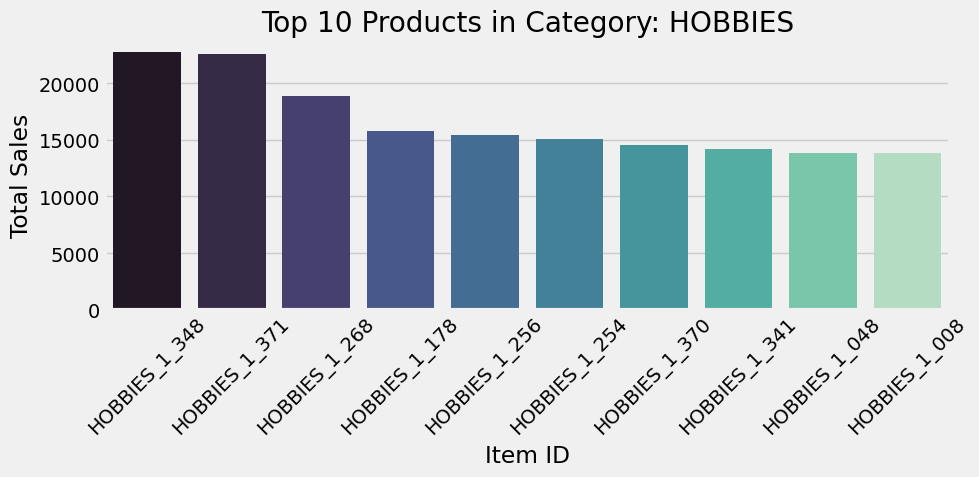

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




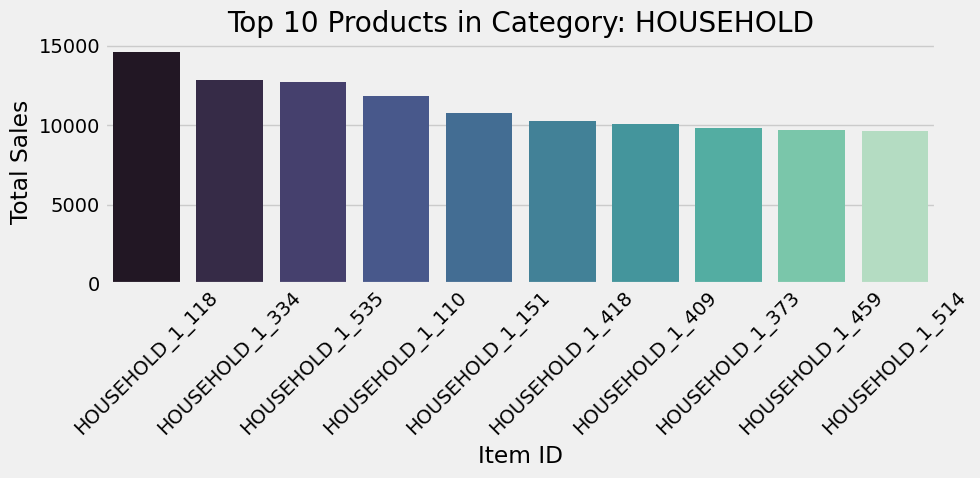

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




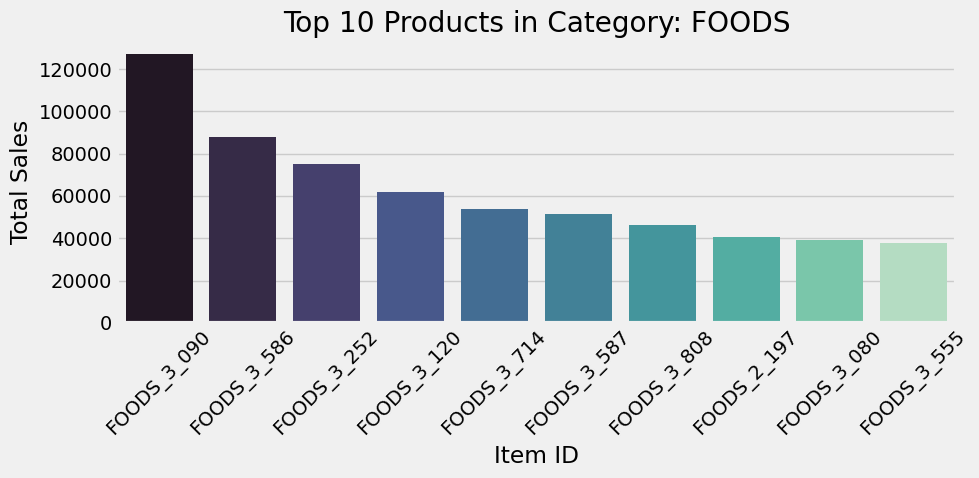

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




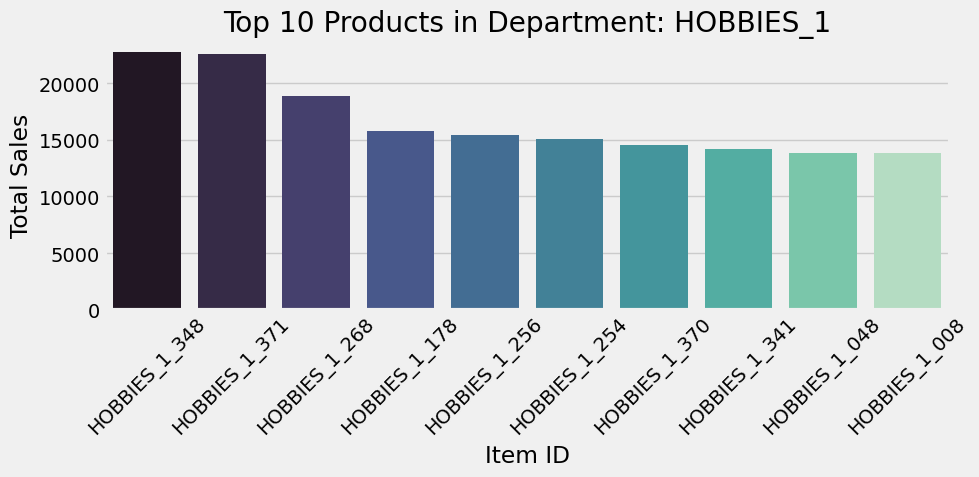

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




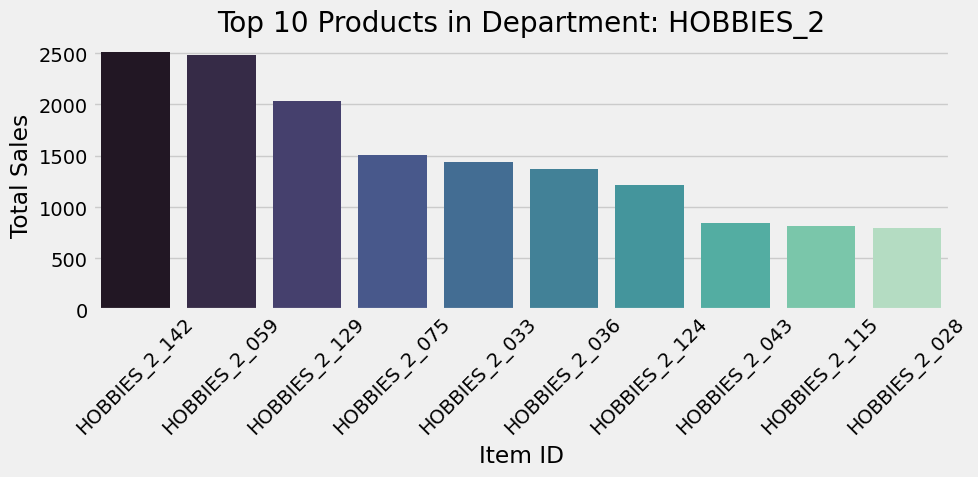

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




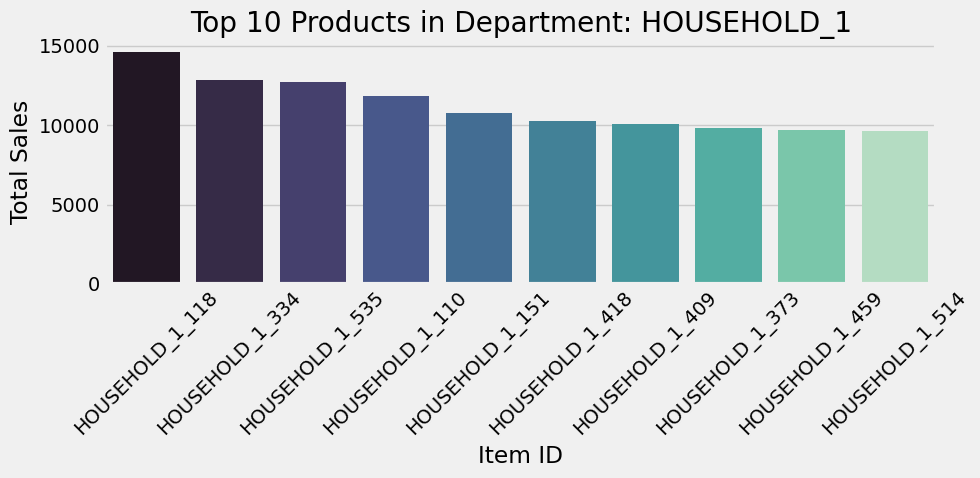

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




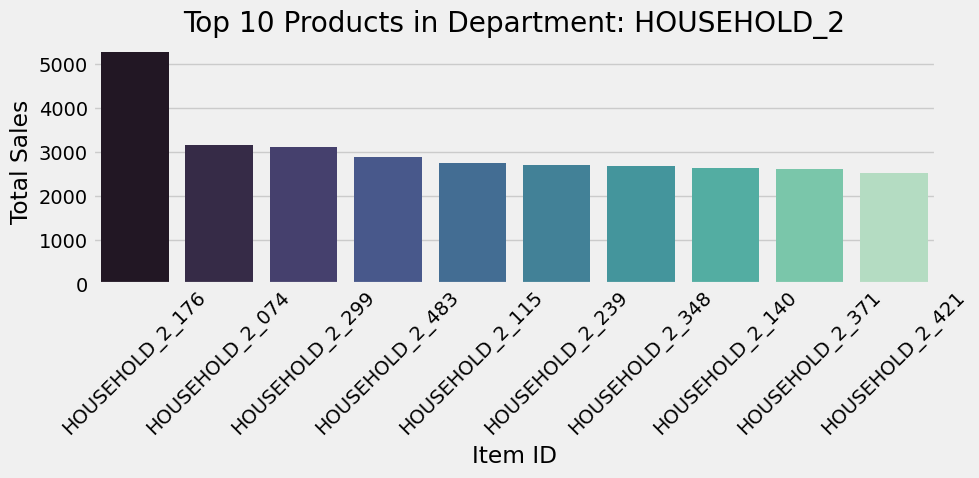

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




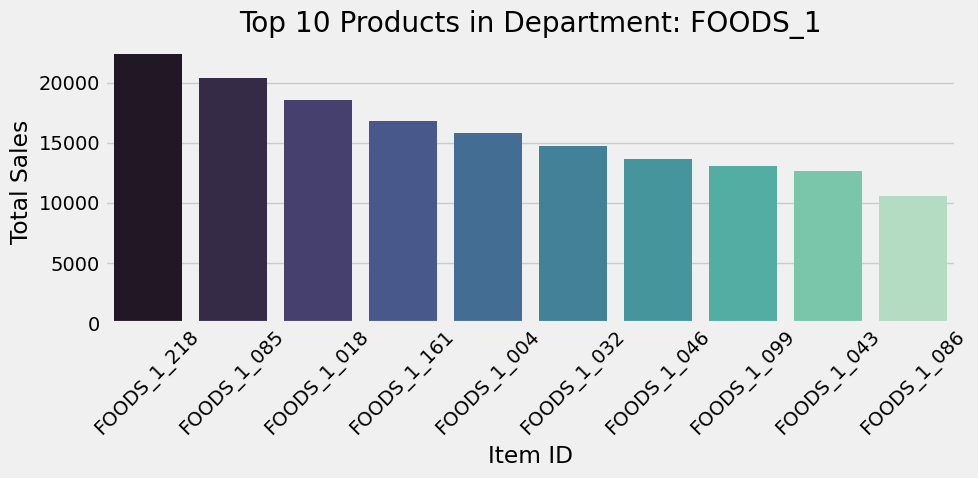

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




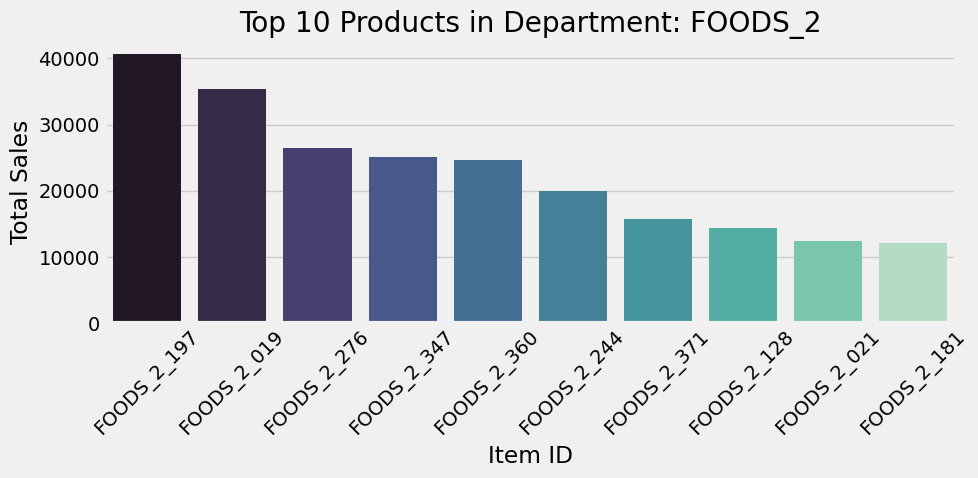

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




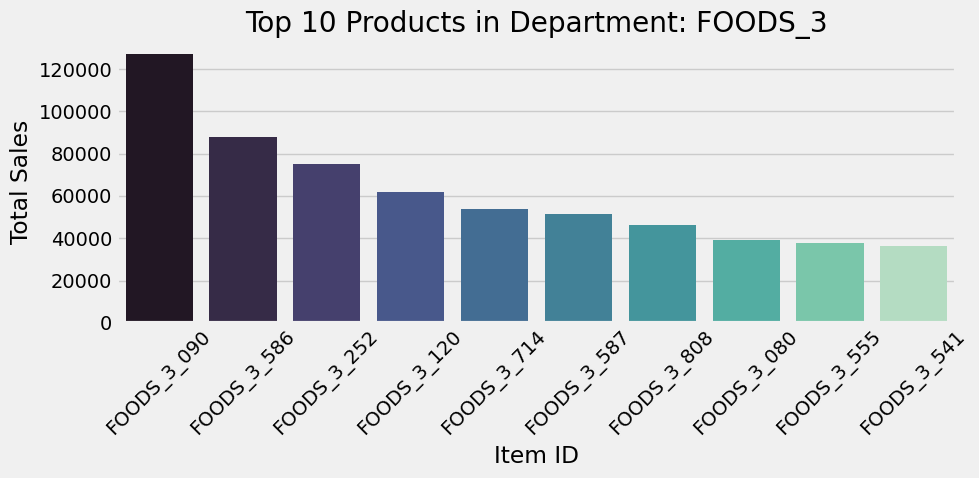

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




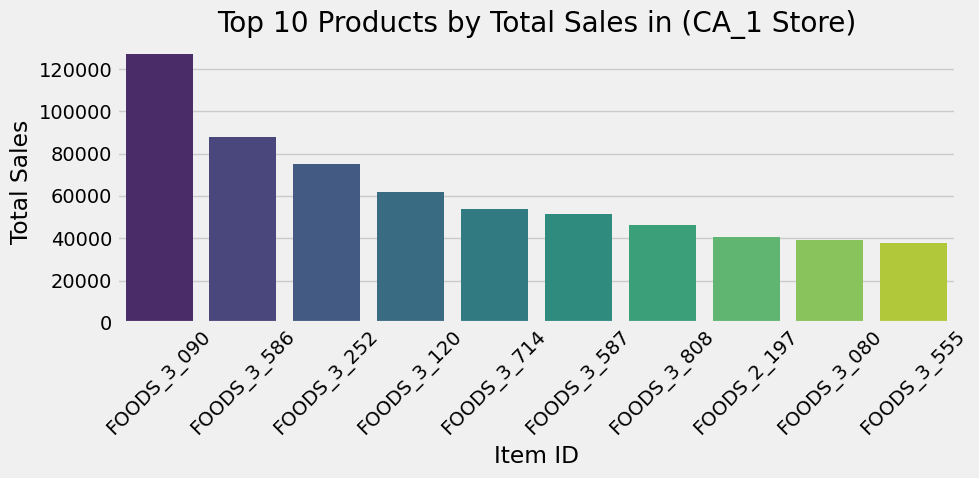

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




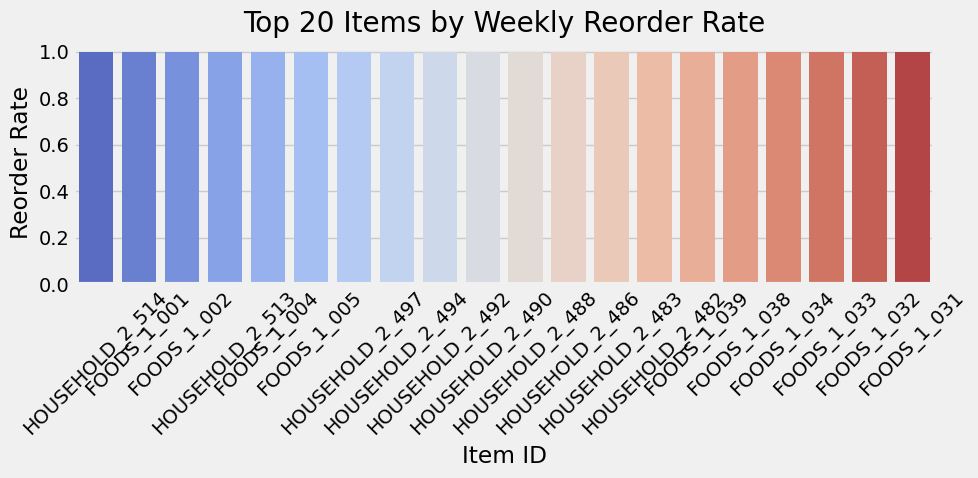

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




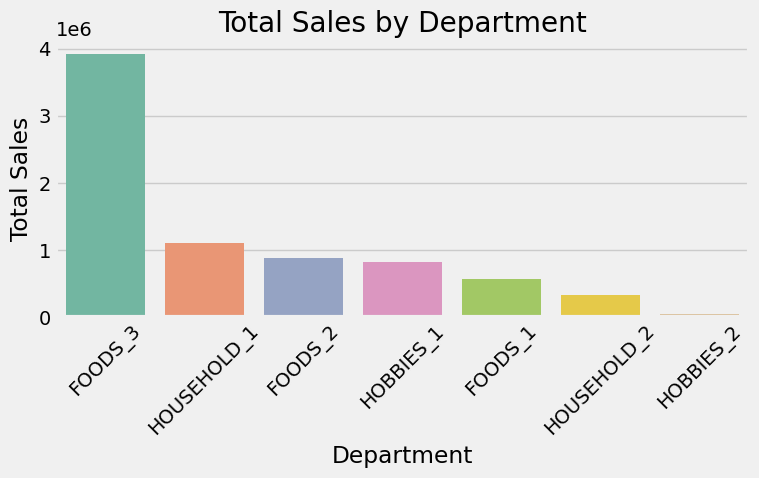

/tmp/ipython-input-210-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




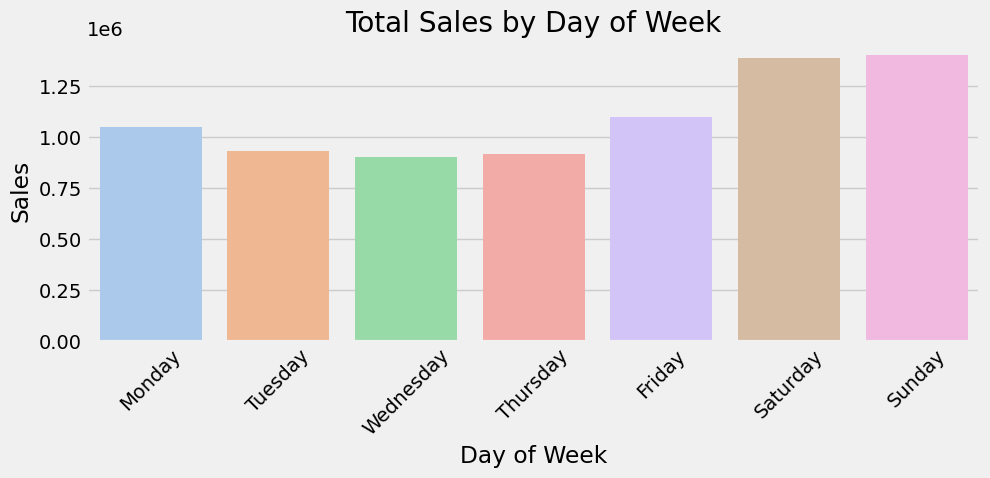

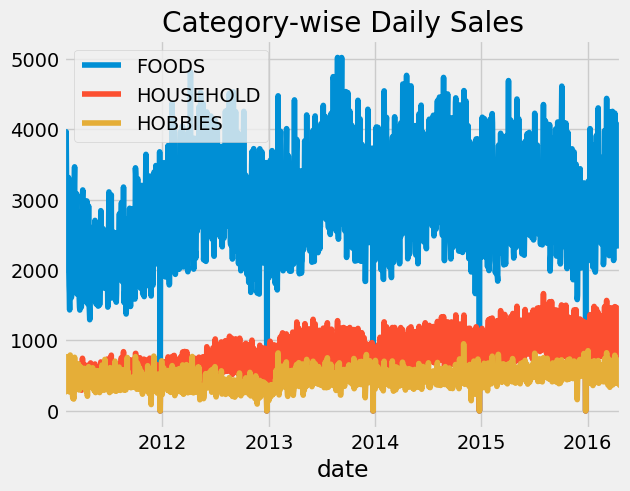

In [214]:
### ---- 1. Top 10 Products Sold by Categories ---- ###

for category in sales_long['cat_id'].unique():
    top_cat_products = (
        sales_long[sales_long['cat_id'] == category]
        .groupby('item_id')['sales']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
    plot_bar(
        top_cat_products,
        title=f"Top 10 Products in Category: {category}",
        xlabel="Item ID",
        ylabel="Total Sales",
        palette="mako"
    )
### ---- 1. Top 10 Products Sold by Department ---- ###

for department in sales_long['dept_id'].unique():
    top_cat_products = (
        sales_long[sales_long['dept_id'] == department]
        .groupby('item_id')['sales']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
    plot_bar(
        top_cat_products,
        title=f"Top 10 Products in Department: {department}",
        xlabel="Item ID",
        ylabel="Total Sales",
        palette="mako"
    )

top_products = sales_long.groupby('item_id')['sales'].sum().sort_values(ascending=False).head(10)
plot_bar(top_products, "Top 10 Products by Total Sales in (CA_1 Store)", "Item ID", "Total Sales")

### ---- 2. Simulated Reordered Products (Weekly) ---- ###

weekly_sales = sales_long.groupby(['item_id', 'week'])['sales'].sum().reset_index()
weekly_sales['reordered'] = (weekly_sales['sales'] > 0).astype(int)
reorder_rate = weekly_sales.groupby('item_id')['reordered'].mean().sort_values(ascending=False).head(20)
plot_bar(reorder_rate, "Top 20 Items by Weekly Reorder Rate", "Item ID", "Reorder Rate", palette="coolwarm")

### ---- Reordered Products (Monthly)
monthly_sales = sales_long.groupby(['item_id', 'month'])['sales'].sum().reset_index()
monthly_sales['reordered'] = (monthly_sales['sales'] > 0).astype(int)
reorder_rate = monthly_sales.groupby('item_id')['reordered'].mean()
total_sales = monthly_sales.groupby('item_id')['sales'].sum()

# --- 3. Merge into a single DataFrame ---
reorder_df = pd.DataFrame({
    'reorder_rate': reorder_rate,
    'total_sales': total_sales
}).sort_values('reorder_rate', ascending=False).head(20).reset_index()

# --- 4. Create interactive bar chart with Plotly ---
fig = px.bar(
    reorder_df,
    x='item_id',
    y='reorder_rate',
    color='total_sales',
    color_continuous_scale='Bluered_r',
    hover_data={'total_sales': True, 'reorder_rate': ':.2f', 'item_id': False},
    labels={'item_id': 'Item ID', 'reorder_rate': 'Reorder Rate', 'total_sales': 'Total Sales'},
    title='🔁 Top 20 Items by Monthly Reorder Rate (Color = Total Sales)'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

### ---- 3. Top Departments by Reordered Products ---- ###
dept_sales = sales_long.groupby('dept_id')['sales'].sum().sort_values(ascending=False)
plot_bar(dept_sales, "Total Sales by Department", "Department", "Total Sales", figsize=(8, 5), palette="Set2")

### ---- 4. Orders (Sales) by Day of the Week ---- ###
dow_sales = sales_long.groupby('weekday')['sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plot_bar(dow_sales, "Total Sales by Day of Week", "Day of Week", "Sales", palette="pastel")

for cat in ['FOODS', 'HOUSEHOLD', 'HOBBIES']:
    series = sales_long[sales_long['cat_id'] == cat].groupby('date')['sales'].sum()
    series.plot(label=cat)
plt.legend()
plt.title("Category-wise Daily Sales")
plt.show()


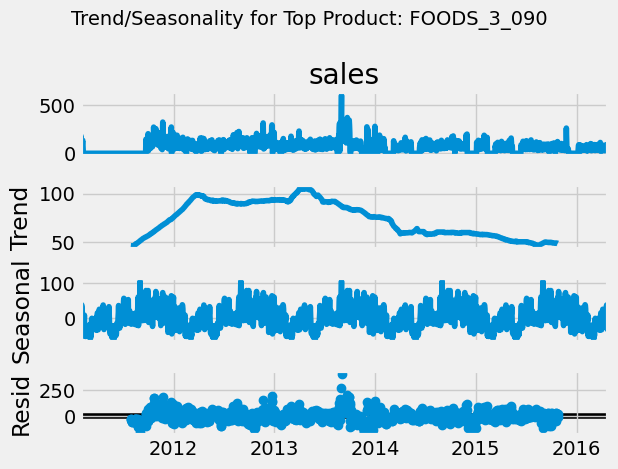

In [215]:
### ---- 5. General Trend & Seasonality (Example Product) ---- ###
example_item = sales_long[sales_long['item_id'] == top_products.index[0]]
daily_series = example_item.groupby('date')['sales'].sum()
# Seasonal decomposition
decomp = seasonal_decompose(daily_series, model='additive', period=365)
decomp.plot()
plt.suptitle(f"Trend/Seasonality for Top Product: {top_products.index[0]}", fontsize=14)
plt.tight_layout()
plt.show()

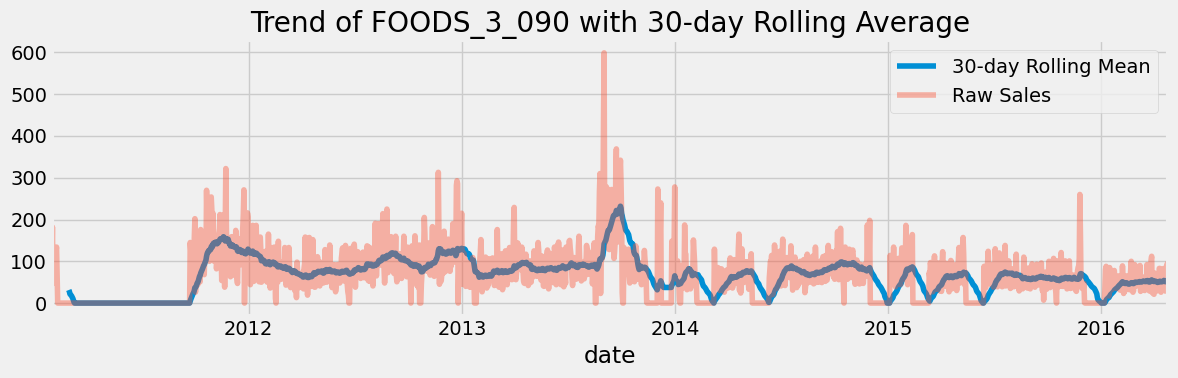

In [216]:
# Rolling average for general trend
plt.figure(figsize=(12, 4))
daily_series.rolling(window=30).mean().plot(label='30-day Rolling Mean')
daily_series.plot(alpha=0.4, label='Raw Sales')
plt.title(f"Trend of {top_products.index[0]} with 30-day Rolling Average")
plt.legend()
plt.tight_layout()
plt.show()


In [217]:
### ---- 6. Basic Feature Engineering ---- ###
sales_long = sales_long.sort_values(['id', 'date'])
sales_long['lag_7'] = sales_long.groupby('id')['sales'].shift(7)
sales_long['rolling_mean_30'] = sales_long.groupby('id')['sales'].shift(1).rolling(30).mean()
sales_long['rolling_std_30'] = sales_long.groupby('id')['sales'].shift(1).rolling(30).std()

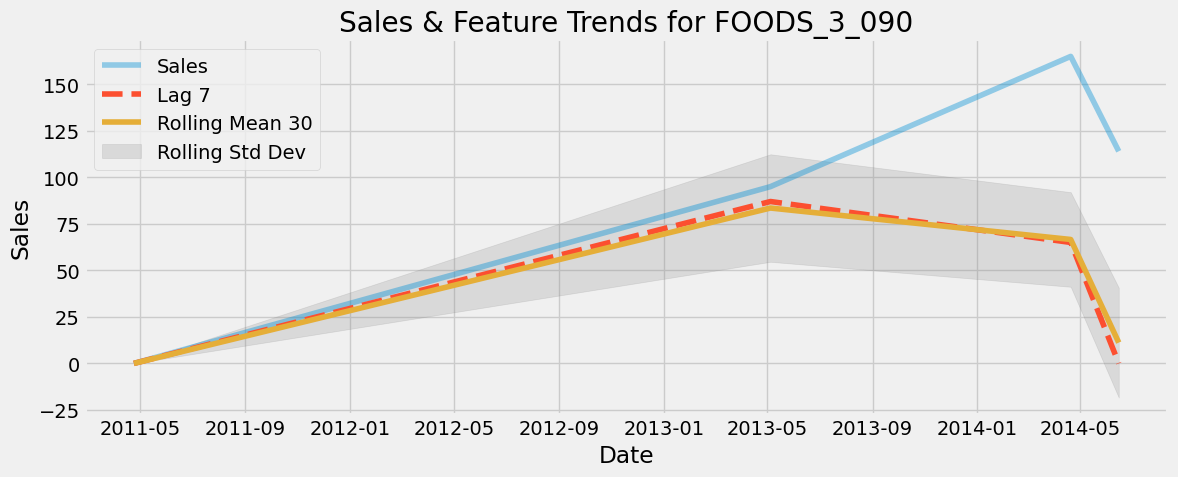

In [218]:
# Visualize features for a top product
fe_sample = sales_long[sales_long['item_id'] == top_products.index[0]].dropna().copy()

plt.figure(figsize=(12, 5))
plt.plot(fe_sample['date'], fe_sample['sales'], label='Sales', alpha=0.4)
plt.plot(fe_sample['date'], fe_sample['lag_7'], label='Lag 7', linestyle='--')
plt.plot(fe_sample['date'], fe_sample['rolling_mean_30'], label='Rolling Mean 30')
plt.fill_between(fe_sample['date'],
                 fe_sample['rolling_mean_30'] - fe_sample['rolling_std_30'],
                 fe_sample['rolling_mean_30'] + fe_sample['rolling_std_30'],
                 color='gray', alpha=0.2, label='Rolling Std Dev')
plt.title(f"Sales & Feature Trends for {top_products.index[0]}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


# **Forecast**

In [219]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [220]:
# Step 1: Build time series for FOOD Category
cat_series = sales_long.groupby(['cat_id', 'date'])['sales'].sum().reset_index()
ts_wide = cat_series.pivot(index='date', columns='cat_id', values='sales')
ts_wide.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,3239,556,542
2011-01-30,3137,498,520
2011-01-31,2008,415,393
2011-02-01,2258,392,401
2011-02-02,2032,268,330


In [221]:
series=ts_wide['FOODS']


<Axes: xlabel='date'>

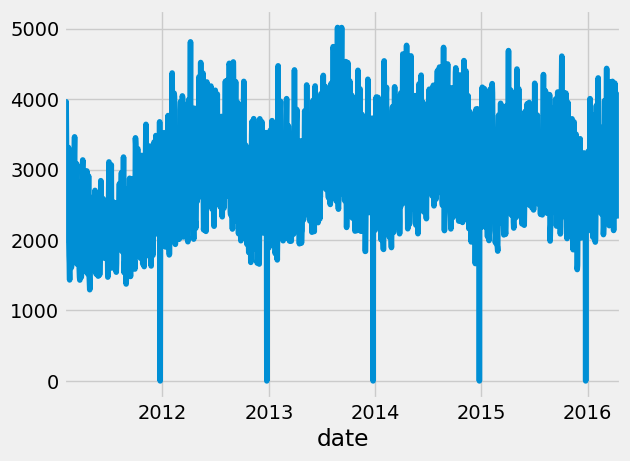

In [222]:
#plot series time series
series.plot()

In [223]:
#check stationarity
result = adfuller(series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Stationary ✅" if result[1] < 0.05 else "Non-stationary ❌")

ADF Statistic: -2.393878865052379
p-value: 0.143471512339925
Non-stationary ❌


In [224]:
#Non seasonal differencing
series_diff1=series.diff().dropna()
result = adfuller(series_diff1)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Stationary ✅" if result[1] < 0.05 else "Non-stationary ❌")

ADF Statistic: -21.436253802377934
p-value: 0.0
Stationary ✅


<Axes: xlabel='date'>

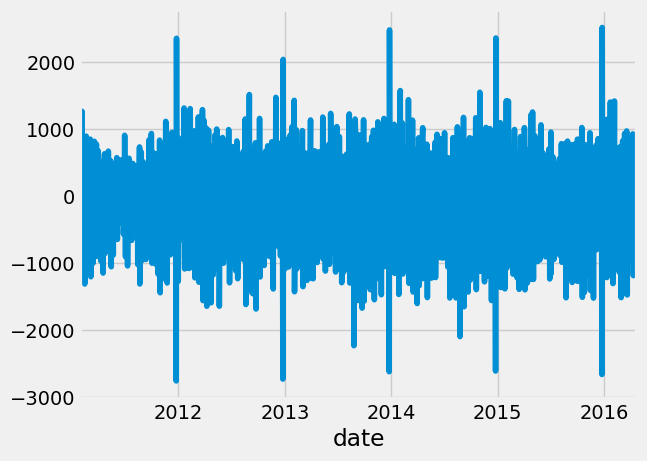

In [225]:
series_diff1.plot()

In [226]:
series_diff2=series.diff(7).dropna()
result = adfuller(series_diff2)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Stationary ✅" if result[1] < 0.05 else "Non-stationary ❌")

ADF Statistic: -18.854236750616053
p-value: 0.0
Stationary ✅


<Axes: xlabel='date'>

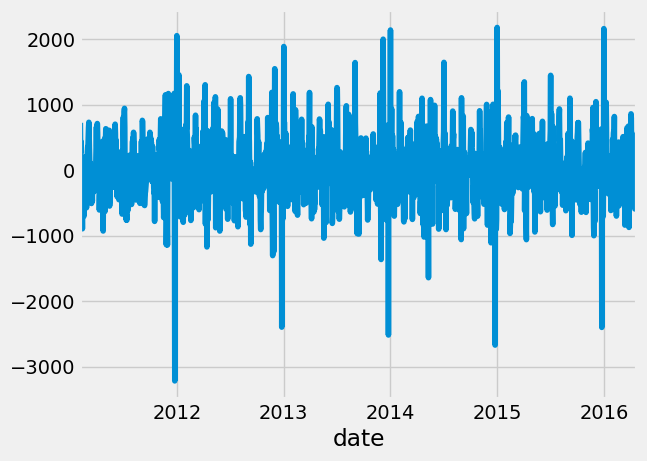

In [227]:
series_diff2.plot()

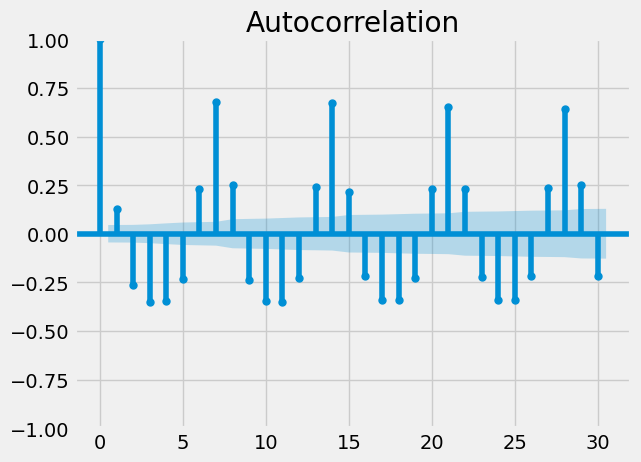

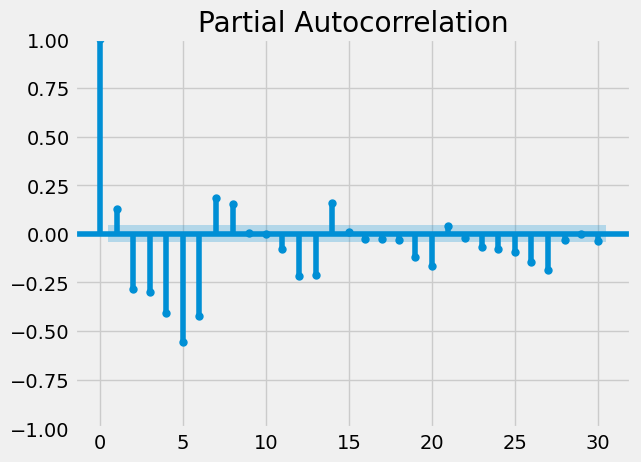

In [228]:
# Step 6: ACF & PACF to choose ARIMA(p,d,q)
plot_acf(series_diff1, lags=30)
plot_pacf(series_diff1, lags=30)
plt.show()

**ARIMA**

In [229]:
# Step 7: Fit ARIMA model
model = ARIMA(series, order=(4,1,2))
model_fit = model.fit()
print(model_fit.summary())
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferr

                               SARIMAX Results                                
Dep. Variable:                  FOODS   No. Observations:                 1913
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -14077.600
Date:                Tue, 29 Jul 2025   AIC                          28169.200
Time:                        12:49:05   BIC                          28208.092
Sample:                    01-29-2011   HQIC                         28183.513
                         - 04-24-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7423      0.018     40.343      0.000       0.706       0.778
ar.L2         -0.8436      0.023    -36.526      0.000      -0.889      -0.798
ar.L3          0.0878      0.023      3.824      0.0

In [230]:
split_index = int(len(series) * 0.8)
train = series.iloc[:split_index]
test = series.iloc[split_index:]

In [231]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index  # Align the forecast with test dates

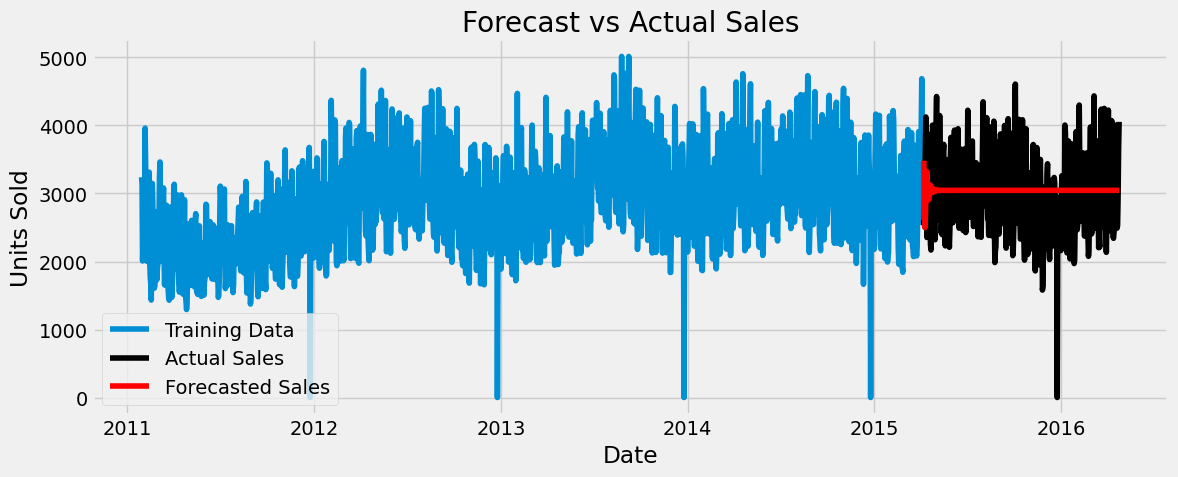

In [232]:

plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='black')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title("Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [233]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 554.435916041512, RMSE: 647.5620266195516


**SARIMA**

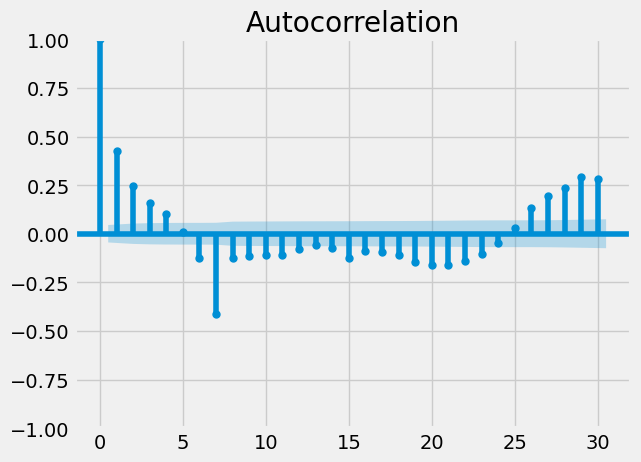

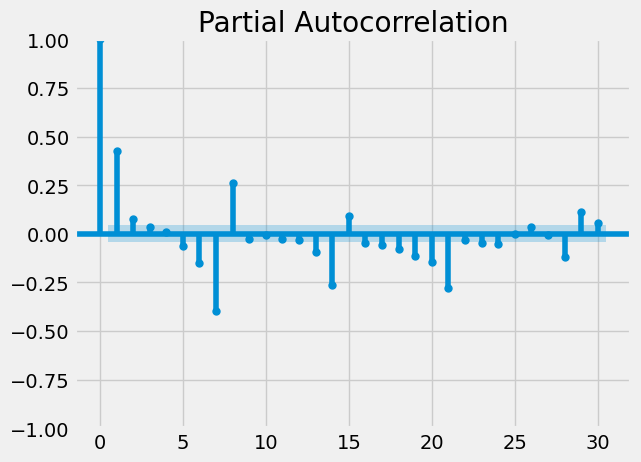

In [234]:
# Step 6: ACF & PACF to choose seaonal ARIMA paramters(P,D,Q)
plot_acf(series_diff2, lags=30)
plot_pacf(series_diff2, lags=30)
plt.show()

In [235]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order=(2,1,2),
                seasonal_order=(1,1,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
results.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               FOODS   No. Observations:                 1530
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 7)   Log Likelihood              -10948.558
Date:                             Tue, 29 Jul 2025   AIC                          21911.116
Time:                                     12:49:16   BIC                          21948.364
Sample:                                 01-29-2011   HQIC                         21924.987
                                      - 04-07-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4254      0.043     33.223      0.000       1.341       1.510
ar.L2         -0.5447      0.022    -25.020      0.000      -0.587      -0.502
ma.L1         -1.8500      0.044    -42.018      0.000      -1.936      -1.764
ma.L2          0.8558      0.043     19.809      0.000       0.771       0.940
ar.S.L7        0.1863      0.031      6.049      0.000       0.126       0.247
ma.S.L7       -0.9357      0.015    -61.463      0.000      -0.966      -0.906
sigma2      1.245e+05   2417.635     51.504      0.000     1.2e+05    1.29e+05
===================================================================================
Ljung-Box (L1) (Q):                  19.94   Jarque-Bera (JB):              6271.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.91
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

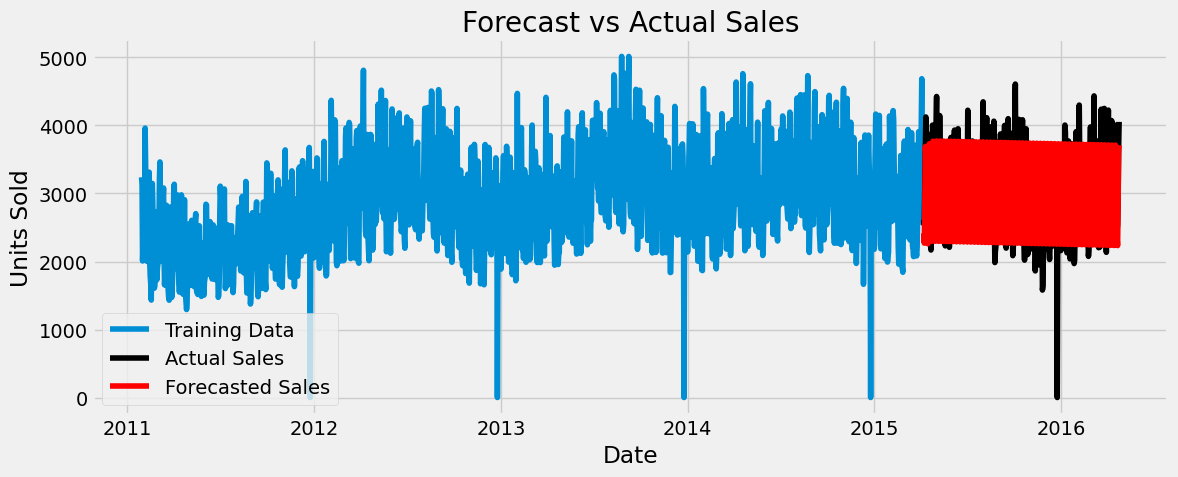

In [236]:
forecast = results.forecast(steps=len(test))
forecast.index = test.index  # Align the forecast with test dates
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='black')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title("Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [237]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 267.633447303104, RMSE: 370.5066010155563


**SARIMAX**

In [238]:
exog_vars = pd.get_dummies(sales_long[['weekday', 'event_name_1','event_name_2']], drop_first=True)

# Add snap_CA
exog_vars['snap_CA'] = sales_long['snap_CA']

In [239]:
exog_df = sales_long[['date', 'cat_id', 'weekday', 'event_name_1','event_name_2', 'snap_CA']]

# Keep only 'FOODS' category
exog_df = exog_df[exog_df['cat_id'] == 'FOODS']

# Group by date to match series
exog_df = exog_df.groupby('date').agg({
    'weekday': lambda x: x.mode()[0],   # most common weekday
    'event_name_1': lambda x: x.mode(dropna=True)[0] if not x.dropna().empty else 'None',
    'event_name_2': lambda x: x.mode(dropna=True)[0] if not x.dropna().empty else 'None',
    'snap_CA': 'max'  # if any day has SNAP=1, keep it
}).reset_index()

# One-hot encode
exog_df_encoded = pd.get_dummies(exog_df.set_index('date'), drop_first=True)

# Final alignment
exog_df_encoded = exog_df_encoded.astype(int)
exog_df_encoded = exog_df_encoded.loc[series.index]  # same date index as series

exog_train = exog_df_encoded.loc[train.index]
exog_test = exog_df_encoded.loc[test.index]



In [240]:
print(test.index)
print(train.index)
print(exog_train.index)
print(exog_test.index)

DatetimeIndex(['2015-04-08', '2015-04-09', '2015-04-10', '2015-04-11',
               '2015-04-12', '2015-04-13', '2015-04-14', '2015-04-15',
               '2015-04-16', '2015-04-17',
               ...
               '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18',
               '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22',
               '2016-04-23', '2016-04-24'],
              dtype='datetime64[ns]', name='date', length=383, freq=None)
DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2015-03-29', '2015-03-30', '2015-03-31', '2015-04-01',
               '2015-04-02', '2015-04-03', '2015-04-04', '2015-04-05',
               '2015-04-06', '2015-04-07'],
              dtype='datetime64[ns]', name='date', length=1530, freq=None)
DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',


In [241]:
exog_df_encoded.head()

,snap_CA,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,event_name_1_Christmas,event_name_1_Cinco De Mayo,event_name_1_ColumbusDay,...,event_name_1_Ramadan starts,event_name_1_StPatricksDay,event_name_1_SuperBowl,event_name_1_Thanksgiving,event_name_1_ValentinesDay,event_name_1_VeteransDay,event_name_2_Easter,event_name_2_Father's day,event_name_2_None,event_name_2_OrthodoxEaster
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2011-01-30,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2011-01-31,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2011-02-01,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2011-02-02,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [242]:
from pmdarima import auto_arima

# Find best ARIMA order
auto_model = auto_arima(
    train, exogenous=exog_train,
    seasonal=True, m=7,
    trace=True, error_action='ignore', suppress_warnings=True
)
print(auto_model.summary())

ModuleNotFoundError: No module named 'pmdarima'

In [243]:
model = SARIMAX(train,
                exog=exog_train,
                order=(2,1,2),
                seasonal_order=(1,1,1,30),
                enforce_stationarity=True,
                enforce_invertibility=False)
results = model.fit(maxiter=10000)
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                      SARIMAX Results                                       
Dep. Variable:                                FOODS   No. Observations:                 1530
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 30)   Log Likelihood              -10441.909
Date:                              Tue, 29 Jul 2025   AIC                          20979.818
Time:                                      13:05:57   BIC                          21234.821
Sample:                                  01-29-2011   HQIC                         21074.819
                                       - 04-07-2015                                         
Covariance Type:                                opg                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
snap_CA                            217.9703     23.759

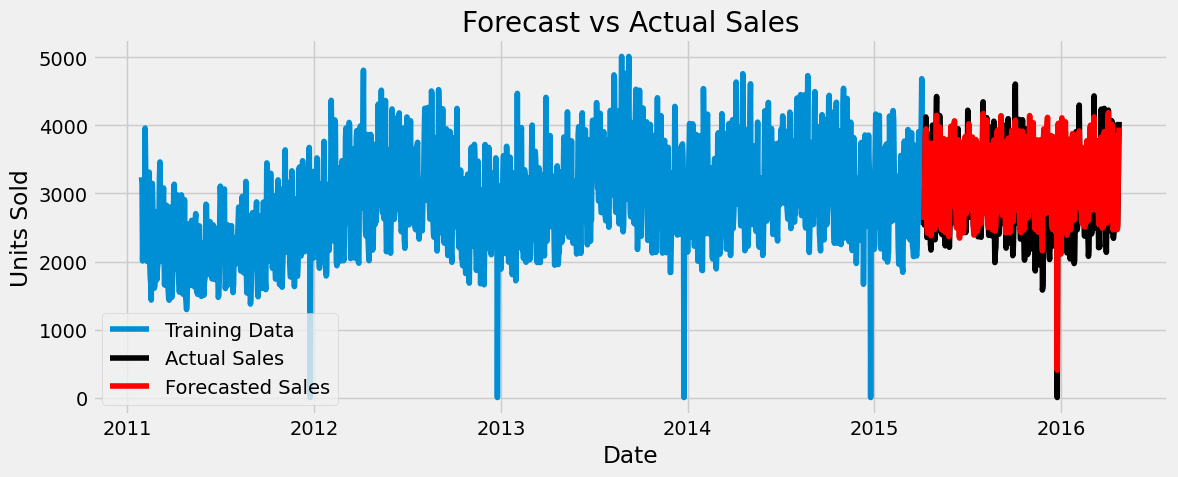

In [244]:
forecast = results.forecast(steps=len(test),exog=exog_test)
forecast.index = test.index  # Align the forecast with test dates
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='black')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title("Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [245]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 267.0184118018568, RMSE: 358.11151573407017


**Exponential Smoothing**

In [246]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model (multiplicative or additive depending on data nature)
model = ExponentialSmoothing(
    train,
    trend='add',          # or 'mul' if data grows multiplicatively
    seasonal='add',       # or 'mul'
    seasonal_periods=7    # weekly seasonality for daily data
)

hw_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [247]:
forecast_hw = hw_fit.forecast(steps=len(test))  # Forecast same number of days as test
forecast_hw.index = test.index  # Align with test dates

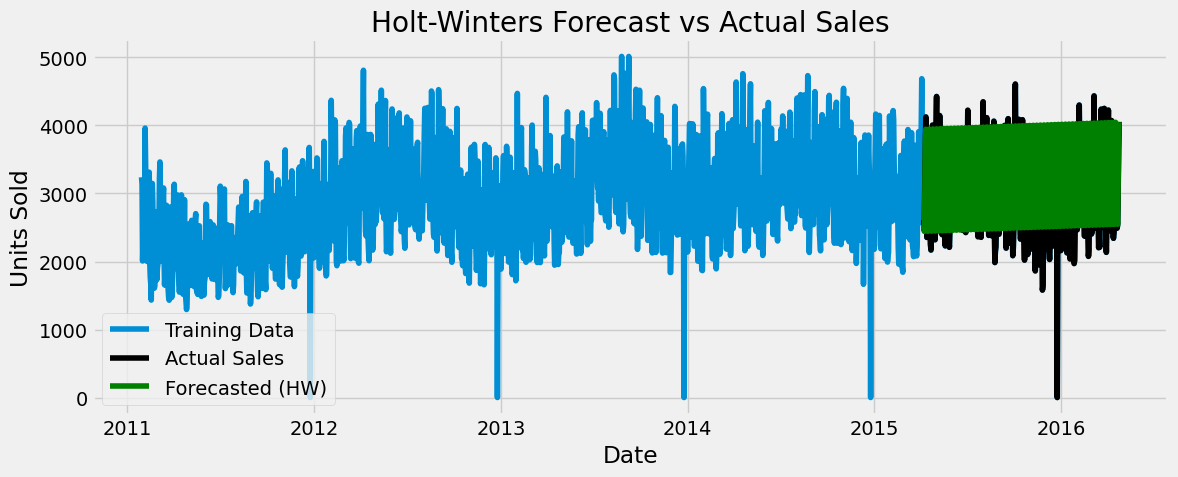

In [248]:
plt.figure(figsize=(12, 5))
plt.plot(series.index, series, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='black')
plt.plot(forecast_hw.index, forecast_hw, label='Forecasted (HW)', color='green')

plt.title("Holt-Winters Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [249]:
mae = mean_absolute_error(test, forecast_hw)
rmse = np.sqrt(mean_squared_error(test, forecast_hw))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 309.92482960117053, RMSE: 421.3140641194715


**Prophet Model**

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
df = series.reset_index()
df.columns = ['ds', 'y']

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily Number of Food Sales')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(df)